In [1]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

#Import the requests library 
import requests 

#Import the API key 
from config import weather_api_key 

# Import the datetime module from the datatime library 
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e43cf2ff3dd723d916a3acbdadfe7598


In [3]:
# Create a set of random latitudes and longitudes combinations
lats = np.random.uniform(low = -90.00, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters 
record_count = 1
set_count = 1 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zdvinsk
Processing Record 2 of Set 1 | itarema
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | araouane
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | mulanje
Processing Record 11 of Set 1 | oussouye
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | itaituba
Processing Record 19 of Set 1 | alexandria
Processing Record 20 of Set 1 | yar-sale
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 

Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | asmar
Processing Record 44 of Set 4 | shetpe
Processing Record 45 of Set 4 | shingu
Processing Record 46 of Set 4 | nuevo progreso
Processing Record 47 of Set 4 | acapulco
Processing Record 48 of Set 4 | sabang
Processing Record 49 of Set 4 | meyungs
City not found. Skipping...
Processing Record 50 of Set 4 | port alfred
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | ketchikan
Processing Record 4 of Set 5 | port alberni
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | dwarka
Processing Record 8 of Set 5 | qaanaaq
Processing Record 9 of Set 5 | novoukrainskiy
Processing Record 10 of Set 5 | cayenne
Processing Record 11 of Set 5 | rorvik
Processing Record 12 of Set 5 | oliva
Processing Record 13 of Set 5 | kodiak
Processing Record 14 of Set 5 | manta
Processing Record 15 of Set

City not found. Skipping...
Processing Record 31 of Set 8 | chapais
Processing Record 32 of Set 8 | mahebourg
Processing Record 33 of Set 8 | ponta do sol
Processing Record 34 of Set 8 | kortkeros
Processing Record 35 of Set 8 | berdychiv
Processing Record 36 of Set 8 | zinder
Processing Record 37 of Set 8 | maraa
Processing Record 38 of Set 8 | mocambique
City not found. Skipping...
Processing Record 39 of Set 8 | imeni zhelyabova
Processing Record 40 of Set 8 | wahran
City not found. Skipping...
Processing Record 41 of Set 8 | iquitos
Processing Record 42 of Set 8 | walvis bay
Processing Record 43 of Set 8 | plettenberg bay
Processing Record 44 of Set 8 | nishihara
Processing Record 45 of Set 8 | srednekolymsk
Processing Record 46 of Set 8 | padang
Processing Record 47 of Set 8 | daru
Processing Record 48 of Set 8 | tadine
Processing Record 49 of Set 8 | krasnoselkup
Processing Record 50 of Set 8 | chulman
Processing Record 1 of Set 9 | forest grove
Processing Record 2 of Set 9 | ngu

Processing Record 18 of Set 12 | colares
Processing Record 19 of Set 12 | ndago
Processing Record 20 of Set 12 | hokitika
Processing Record 21 of Set 12 | leningradskiy
Processing Record 22 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 23 of Set 12 | vagur
Processing Record 24 of Set 12 | asau
Processing Record 25 of Set 12 | guerrero negro
Processing Record 26 of Set 12 | geraldton
Processing Record 27 of Set 12 | suarez
Processing Record 28 of Set 12 | ampanihy
Processing Record 29 of Set 12 | pochutla
Processing Record 30 of Set 12 | hervey bay
Processing Record 31 of Set 12 | buin
Processing Record 32 of Set 12 | chuzhou
Processing Record 33 of Set 12 | ozd
Processing Record 34 of Set 12 | penzance
Processing Record 35 of Set 12 | salalah
Processing Record 36 of Set 12 | at-bashi
Processing Record 37 of Set 12 | vanimo
Processing Record 38 of Set 12 | fort nelson
Processing Record 39 of Set 12 | westpunt
City not found. Skipping...
Processing Record 40 of Set 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zdvinsk,54.70,78.66,35.85,81,80,11.65,RU,2020-11-02 06:08:03
1,Itarema,-2.92,-39.92,80.35,76,89,9.64,BR,2020-11-02 06:08:03
2,Yellowknife,62.46,-114.35,6.80,84,90,4.70,CA,2020-11-02 06:07:53
3,Castro,-24.79,-50.01,51.22,86,63,8.55,BR,2020-11-02 06:08:03
4,Faanui,-16.48,-151.75,80.26,80,31,18.43,PF,2020-11-02 06:08:03
5,Rikitea,-23.12,-134.97,73.90,84,78,23.85,PF,2020-11-02 06:08:03
6,Araouane,18.90,-3.53,78.35,18,88,7.23,ML,2020-11-02 06:08:04
7,Bluff,-46.60,168.33,55.00,64,29,7.00,NZ,2020-11-02 06:08:04
8,Mulanje,-16.03,35.50,80.35,58,2,3.53,MW,2020-11-02 06:08:04
9,Oussouye,12.48,-16.55,79.34,79,0,6.93,SN,2020-11-02 06:08:04


In [9]:
#Rearrange the column 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zdvinsk,RU,2020-11-02 06:08:03,54.70,78.66,35.85,81,80,11.65
1,Itarema,BR,2020-11-02 06:08:03,-2.92,-39.92,80.35,76,89,9.64
2,Yellowknife,CA,2020-11-02 06:07:53,62.46,-114.35,6.80,84,90,4.70
3,Castro,BR,2020-11-02 06:08:03,-24.79,-50.01,51.22,86,63,8.55
4,Faanui,PF,2020-11-02 06:08:03,-16.48,-151.75,80.26,80,31,18.43
5,Rikitea,PF,2020-11-02 06:08:03,-23.12,-134.97,73.90,84,78,23.85
6,Araouane,ML,2020-11-02 06:08:04,18.90,-3.53,78.35,18,88,7.23
7,Bluff,NZ,2020-11-02 06:08:04,-46.60,168.33,55.00,64,29,7.00
8,Mulanje,MW,2020-11-02 06:08:04,-16.03,35.50,80.35,58,2,3.53
9,Oussouye,SN,2020-11-02 06:08:04,12.48,-16.55,79.34,79,0,6.93


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
import time 

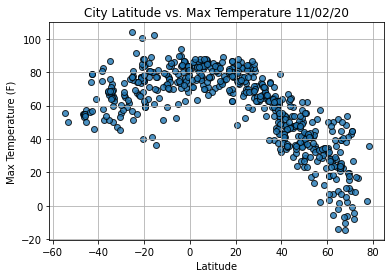

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

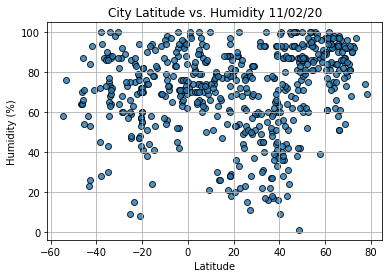

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

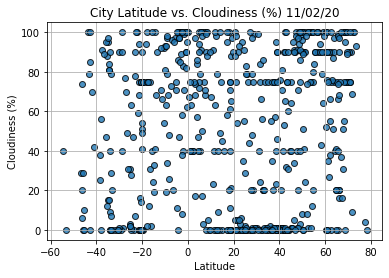

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

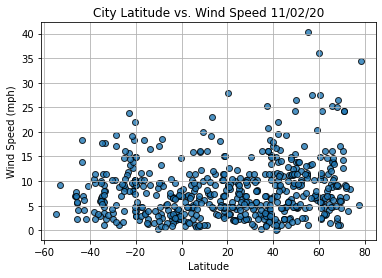

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2020-11-02 06:08:05
Lat                        -34.42
Lng                         19.23
Max Temp                       68
Humidity                       75
Cloudiness                     84
Wind Speed                   5.99
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >=0

0       True
1      False
2       True
3      False
4      False
       ...  
554     True
555     True
556    False
557    False
558     True
Name: Lat, Length: 559, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zdvinsk,RU,2020-11-02 06:08:03,54.70,78.66,35.85,81,80,11.65
2,Yellowknife,CA,2020-11-02 06:07:53,62.46,-114.35,6.80,84,90,4.70
6,Araouane,ML,2020-11-02 06:08:04,18.90,-3.53,78.35,18,88,7.23
9,Oussouye,SN,2020-11-02 06:08:04,12.48,-16.55,79.34,79,0,6.93
12,Albany,US,2020-11-02 06:04:04,42.60,-73.97,36.00,71,65,8.97


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

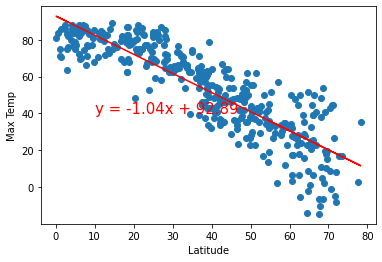

In [25]:
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

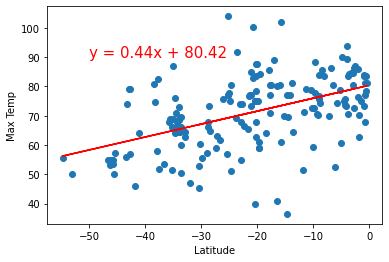

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

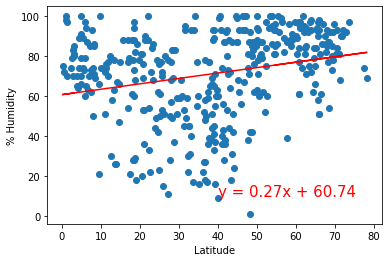

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

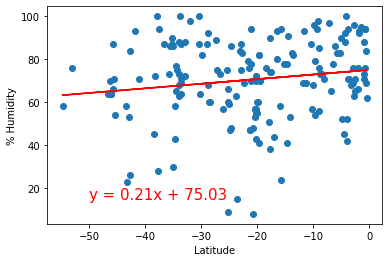

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

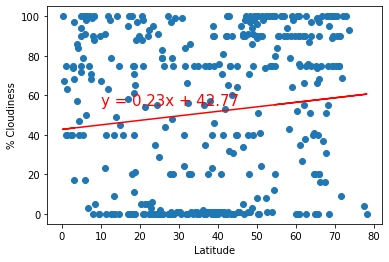

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

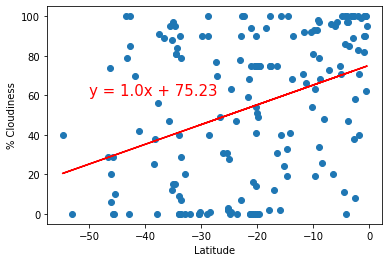

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

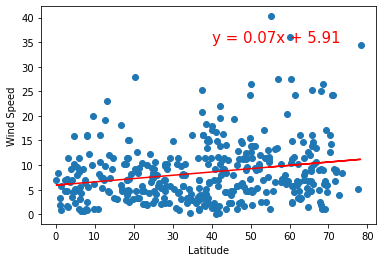

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

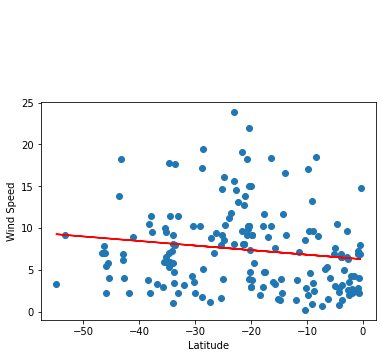

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))